In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
olist_customers = pd.read_csv("data/olist_customers_dataset.csv")
olist_geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
olist_orders = pd.read_csv("data/olist_orders_dataset.csv")
olist_order_items = pd.read_csv("data/olist_order_items_dataset.csv")
olist_order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
olist_order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
olist_products = pd.read_csv("data/olist_products_dataset.csv")
olist_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")

# Moyenne du nombre de commandes par vendeur par région

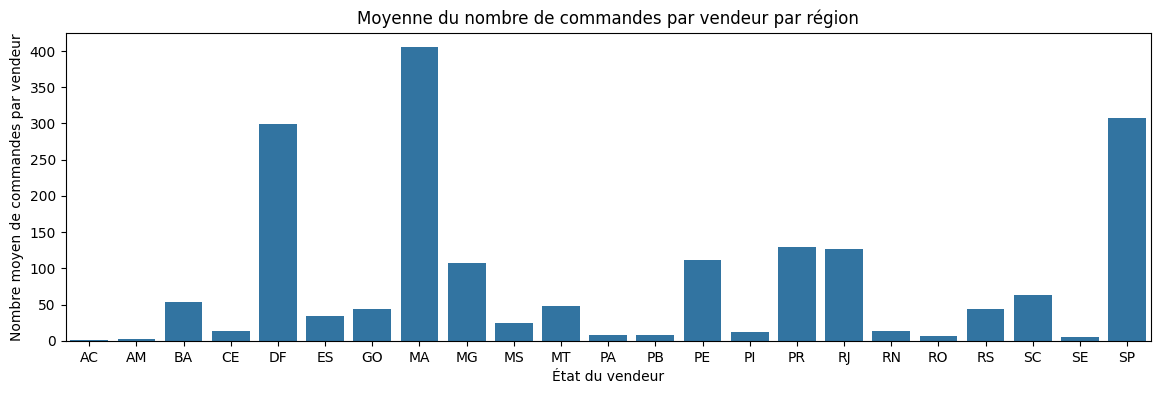

In [45]:
seller_orders = pd.merge(olist_sellers, olist_order_items, on='seller_id', how='inner')

seller_orders_per_region = seller_orders.groupby(['seller_state', 'seller_city']).size().reset_index(name='order_count')
average_orders_per_seller = seller_orders_per_region.groupby('seller_state')['order_count'].mean().reset_index(name='average_orders')

plt.figure(figsize=(14, 4))
sns.barplot(y='average_orders', x='seller_state', data=average_orders_per_seller)
plt.ylabel('Nombre moyen de commandes par vendeur')
plt.xlabel('État du vendeur')
plt.title('Moyenne du nombre de commandes par vendeur par région')
plt.show()

# Les 5 produits les plus vendues

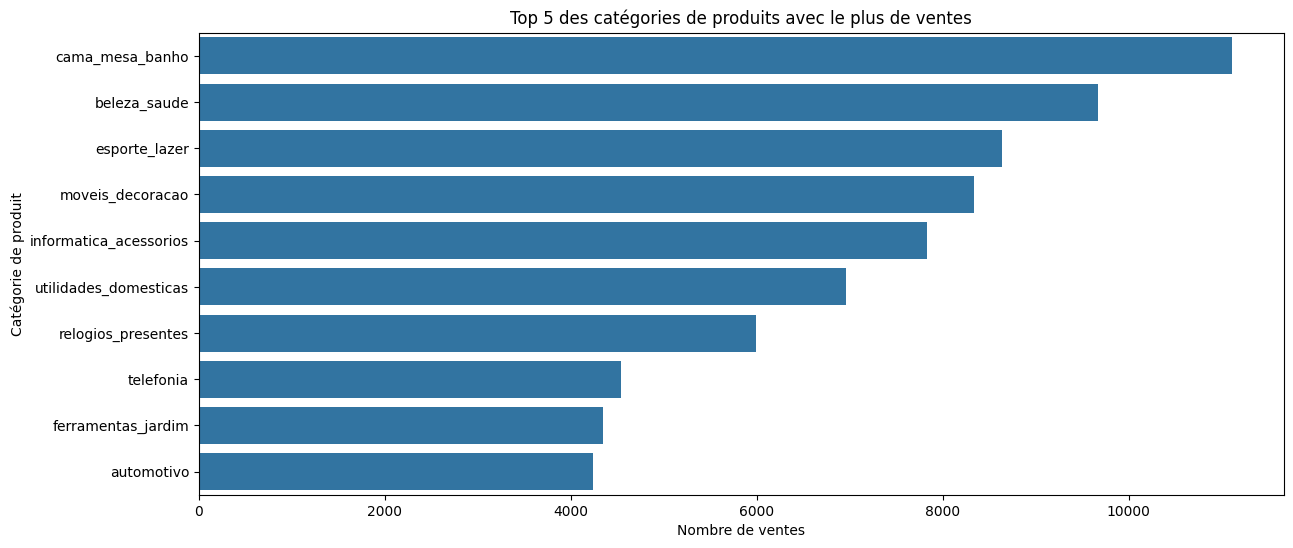

In [63]:
product_order = pd.merge(olist_products, olist_order_items, on='product_id', how='inner')

# 2. Regrouper les données par catégorie de produit et compter le nombre d'occurrences de chaque catégorie
category_sales = product_order.groupby('product_category_name').size().reset_index(name='total_sales')

# 3. Trier les catégories par le nombre d'occurrences dans l'ordre décroissant
top_5_categories = category_sales.sort_values(by='total_sales', ascending=False).head(10)

# 4. Créer un graphique à barres pour afficher le nombre de ventes pour chaque catégorie
plt.figure(figsize=(14, 6))
sns.barplot(x='total_sales', y='product_category_name', data=top_5_categories)
plt.xlabel('Nombre de ventes')
plt.ylabel('Catégorie de produit')
plt.title('Top 5 des catégories de produits avec le plus de ventes')
plt.show()

# REVIEX SCORE

In [73]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Temps d'attente entre la commande et la livraison